## Aidan Tata-Lobo
### Date: 11/15/2023
### Project 2 (Web Scraped Data Analysis)
### *No restrictions in the robot.txt files*

In [91]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
url='https://www.boxofficemojo.com/year/2022/?ref_=bo_hm_yrdom'
response = requests.get(url)
status = response.status_code
if status == 200:
    page = response.text
    soup = bs(page)
else:
    print(f"Oops! Received status code {status}")

In [93]:
print(soup.prettify())
type(soup)

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo">
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <script type="text/javascript">
   var ue_t0=ue_t0||+new Date();
  </script>
  <script type="text/javascript">
   window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=function(b){return f()-(b?0:d.ue_t0)};e.stub=function(b,a){if(!b[a]){var c=[];b[a]=function(){c.push([c.slice.call(arguments),e.d(),d.ue_id])};b[a].replay=function(b){for(var a;a=c.shift();)b(a[0],a[1],a[2])};b[a].isStub=1}};e.exec=function(b,a){return function(){try{return b.apply(this,arguments)}catch(c){ueLogError(c,{attribution:a||"undefined",logLevel:"WARN"})}}}})(ue_csm);


    var ue_err_chan = 'jserr-rw';
(function(d,e){function h(f,b){if(!(a.ec>a.mxe)&&f){a.ter.push(f);b=b||{};var c=f.logLevel||b

bs4.BeautifulSoup

In [94]:
response = requests.get(url)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, 'html.parser')
    
    table = soup.find('table', {'class': 'a-bordered a-horizontal-stripes a-size-base-plus'})
    
    movie_data = []
    
    #iterate through the rows of the table
    for row in soup.find_all('tr')[1:]:  # Skip the header row
        columns = row.find_all('td')
        
        #Get data from each column
        rank = columns[0].get_text(strip=True)
        title = columns[1].get_text(strip=True)
        studio = columns[9].get_text(strip=True)
        total_gross = columns[5].get_text(strip=True)
        total_theaters = columns[6].get_text(strip=True)
        release_date = columns[8].get_text(strip=True)
        
        #append the data to the list
        movie_data.append([rank, title, studio, total_gross, total_theaters, release_date])
    
    #DataFrame from the collected data
    df = pd.DataFrame(movie_data, columns=['Rank', 'Title', 'Studio', 'Total Gross', 'Total Theaters', 'Release Date'])
    
    print(df)

    Rank                                        Title  \
0      1                            Top Gun: Maverick   
1      2               Black Panther: Wakanda Forever   
2      3  Doctor Strange in the Multiverse of Madness   
3      4                     Avatar: The Way of Water   
4      5                      Jurassic World Dominion   
..   ...                                          ...   
195  196                                 King Richard   
196  197                                Superspreader   
197  198                               The Inspection   
198  199                                        Alice   
199  200                        Emergency Declaration   

                                  Studio   Total Gross Total Theaters  \
0                     Paramount Pictures  $718,318,561          4,751   
1    Walt Disney Studios Motion Pictures  $436,499,646          4,396   
2    Walt Disney Studios Motion Pictures  $411,331,607          4,534   
3                   20t

### What percentage did the top 3 movies contribute to the overall total gross?

In [95]:
#Extract the top 3 grossing movies
top_3_gross = df['Total Gross'][:3].str.replace('[\$,]', '', regex=True).astype(int).sum()

In [96]:
sum_gross = df['Total Gross'].str.replace('[\$,]', '', regex=True).astype(int).sum()

In [97]:
percentage = (top_3_gross / sum_gross) * 100
percentage = round(percentage, 2)
print("The top 3 movies grossed", percentage, "% of total gross sales")

The top 3 movies grossed 21.31 % of total gross sales


In [98]:
df['Total Gross'] = df['Total Gross'].str.replace('[\$,]', '', regex=True).astype(int)

### What is the total gross on movies that start with the letter "A"?

In [99]:
#filter for movies that start with the letter "A"
filtered_movies = df[df['Title'].str.startswith('A')]

#Calculate the total gross filtered movies
total_gross_of_filtered_movies = filtered_movies['Total Gross'].sum()

print("Total gross of movies that start with 'A': ${:,}".format(total_gross_of_filtered_movies))

Total gross of movies that start with 'A': $486,269,573


### Which month made the most amount of money?

In [100]:
#Extract the month from the "Release Date" column
df['Month'] = df['Release Date'].str.split().str[0]

#Group data by month and sum the "Total Gross" for each month
monthly_gross = df.groupby('Month')['Total Gross'].sum()

#Find the month with the highest total gross
month_with_most_gross = monthly_gross.idxmax()
total_gross_for_most_month = monthly_gross.max()

print(f"The month that made the most money is {month_with_most_gross}. with a total gross of ${total_gross_for_most_month:,}")

The month that made the most money is May. with a total gross of $1,229,918,850


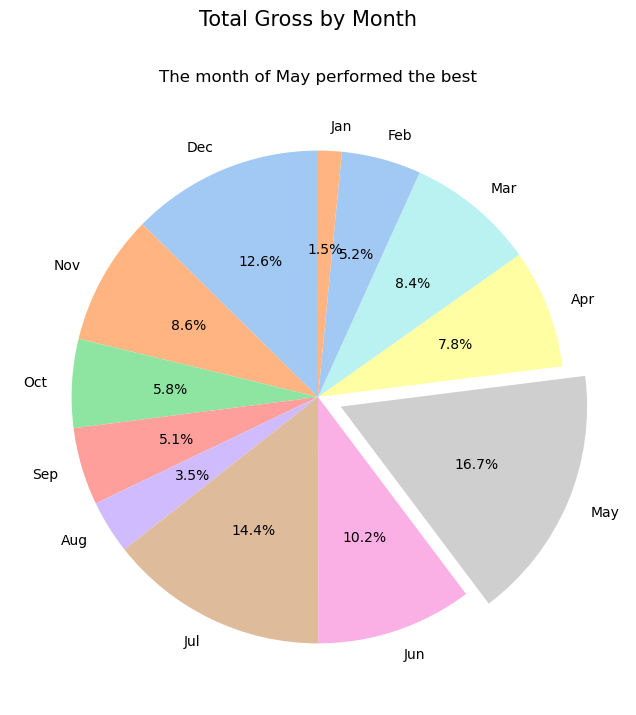

In [101]:
#Sort the months in reverse, it'll display clockwise in the pie chart
months_order = ['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr', 'Mar', 'Feb', 'Jan']
monthly_gross_sorted = monthly_gross.loc[months_order]

#Create pie chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette('pastel')
explode = [0.1 if month == month_with_most_gross else 0 for month in monthly_gross_sorted.index]
plt.pie(monthly_gross_sorted, labels=monthly_gross_sorted.index, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)

#Titles
plt.suptitle('Total Gross by Month', fontsize=15)
plt.title('The month of May performed the best', fontsize=12)

#Show plot
plt.show()

### How many movies start with "The" in their name?

In [102]:
#Count the number of movies with titles that start with "The"
count_the_movies = df[df['Title'].str.startswith('The')]['Title'].count()

print("Number of movies with titles starting with 'The':", count_the_movies)

Number of movies with titles starting with 'The': 36


### What was the sum gross of all movies for each month?

In [103]:
#Get months
df['Month'] = df['Release Date'].str.split().str[0]

#Group data by month and calculate the sum of "Total Gross" for each month
monthly_sum_gross = df.groupby('Month')['Total Gross'].sum()
monthly_sum_gross_formatted = monthly_sum_gross.apply(lambda x: '${:,.0f}'.format(x))

#Chronological list of months
months_chronological = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Reorder the results based on the chronological order of months
monthly_sum_gross_ordered = monthly_sum_gross_formatted.reindex(months_chronological)

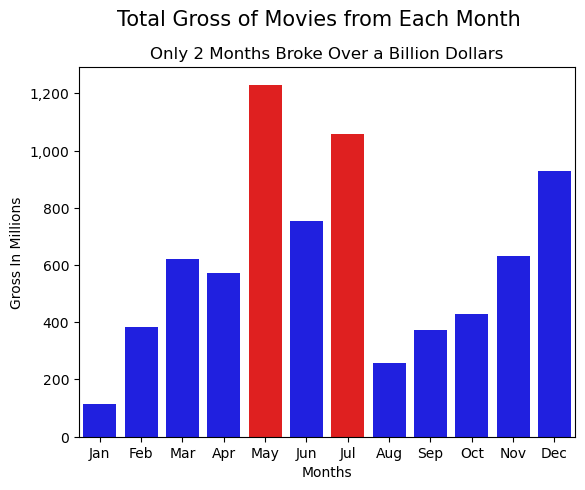

In [104]:
#Remove '$' and ',', convert data to int
monthly_sum_gross_ordered = monthly_sum_gross_ordered.replace('[\$,]', '', regex=True).astype(int)

#Make any columns over a billion red, the rest blue
cols = ['red' if x > 1000000000 else 'blue' for x in monthly_sum_gross_ordered]

#create plot
sns.barplot(x=months_chronological, 
            y=monthly_sum_gross_ordered, 
            palette=cols)

#labels
plt.xlabel('Months')
plt.ylabel('Gross In Millions')
plt.title('Only 2 Months Broke Over a Billion Dollars', fontsize=12)
plt.suptitle('Total Gross of Movies from Each Month', y=1, fontsize=15)
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,.0f}".format(int(x / 1000000))))

# Show the plot
plt.show()